# Exercise 4.3: Independent Component Analysis in Practice


In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

## Blind Source Separation using FastICA

Imagine the following situation: there are three singers in a sound studio. Each of the singers ("sound source") generates a sound wave $s_{i}(t)$ over time $t$. The singers are surrounded by three microphones while each of those are recording the arriving sound $x_{j}(t)$. Given the observations of the three microphones $x_{j}(t), j=\{1,2,3\}$, we now want to compute a reconstruction of the contribution of each singer $s_{i,rec}(t)$ using an ICA model.

__Note:__ In the following code, the true sources $S_{true}$ as well as the mixing matrix $A$ are given to generate the observations $X$. In a real world scenario, this would of course not be the case. Instead, you want to reconstruct the independent sources $S_{rec}$ and the mixing matrix $\hat A$.

__Tasks:__
1. Inspect the given generative model for constructing a data set of the above described scenario and train a FastICA model in order to reconstruct $s_{i,rec}(t)$ of each singer. Therefore, you can use the FastICA implementation of the scikit-learn toolbox. 
2. Visualize the observations $x_{j}(t)$ of every microphone, the reconstructed source signals $s_{i,rec}(t)$ and the true sources for all three components $s_{i,true}(t)$. Therefore, use the function 'visualize_data()' as you need to do such kind of plots a few times within this exercise.
3. Plot histograms of the estimated sources. 

In [85]:
def visualize_data(models, names):
    '''plot figure with subplot for each specified model, 
    in each subplot all three components are shown
    Input: list 'models', 'names' 
           (e.g. models = [X, S_true] and names =['observations X', 'true sources'])'''
    
    colors = ['red', 'skyblue', 'orange']
    
    plt.figure(figsize=(12,8))
    for ii, (model, name) in enumerate(zip(models, names), 1):
        plt.subplot(len(names), 1, ii)
        plt.title(name,fontsize=15)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)
        
    plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
    plt.show()

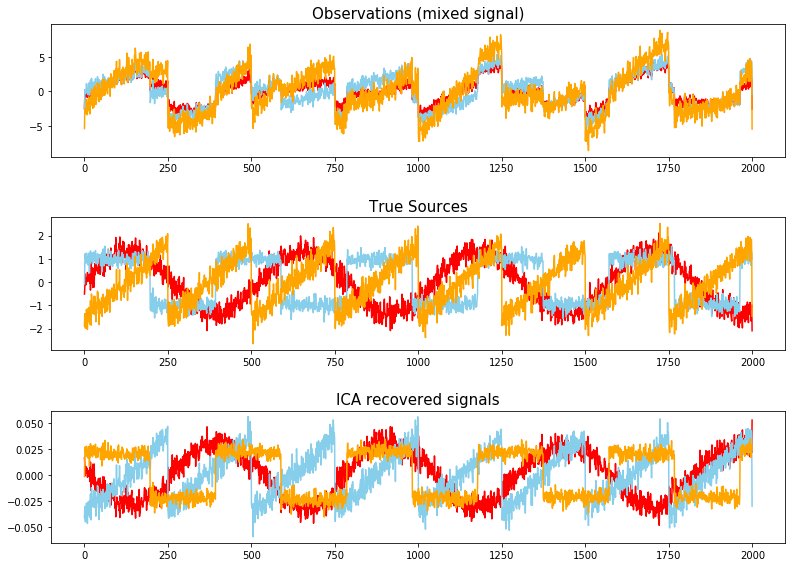

In [86]:
# Generate sample data
np.random.seed(35)
N_samples = 2000
time = np.linspace(0, 8, N_samples)

# Singer 1 : sinusoidal signal
s1 = np.sin(3 * time)  
# Singer 2 : square signal
s2 = np.sign(np.sin(4 * time))
# Singer 3: saw tooth signal
s3 = signal.sawtooth(2 * np.pi * time)  

# concatenate the true single sources and add noise 
S_true = np.c_[s1, s2, s3]
S_true += 0.2 * np.random.normal(size=S_true.shape)  

# standardize the data
S_true /= S_true.std(axis=0) 

# Mix data
A = np.array([[1, 1, 1], [0.3, 2, 1.2], [1.5, 1.2, 2.4]])  # Mixing matrix
X = np.dot(S_true, A.T)

# Task (1): Compute ICA with three components and reconstruct signals from the observations
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
ica = FastICA(n_components=3)  # this might be dumdum approach, but print(ica) shows other possible params
S_ = ica.fit_transform(X)      # print(S_) gives us the signals
A_ = ica.mixing_               # print(A_) is the mixing matrix

# Task (2): Plot the observations X, the true source S_true and the reconstructed sources S_rec
m = [X, S_true, S_]
n = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
visualize_data(m, n)



#### Q4.3.1) Compare the time series of the reconstructed sources with the true sources in terms of their order and sign. What do you observe?
- the sinusoid is 'flipped'
- two signals seem to have been idenfied in the 'wrong' order
- the amplitudes of the recovered signals are ca. 40 times smaller

In [87]:
print(S_.shape)
print(len(S_.shape))
print(len(S_[0]))
# print(len(s_est))

(2000, 3)
2
3


s_1 average rec: 4.440892098500626e-19	 and SD:0.022360679774997932
s_2 average rec: 4.440892098500626e-19	 and SD:0.022360679774997894
s_3 average rec: -3.7747582837255325e-18	 and SD:0.02236067977499792
s_1 average og: 0.023753862444560753	 and SD:0.7123124589209255
s_2 average og: 0.0175	 and SD:0.9995967937123448
s_3 average og: -0.0010000000000005827	 and SD:0.5776381509359543


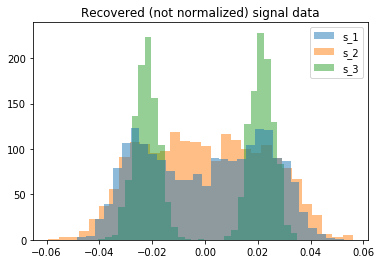

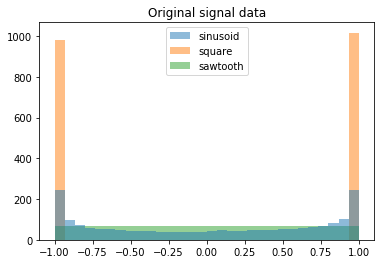

In [88]:
# Task (3): Visualize the histogram of all three estimated independent components

s1e = S_[:,0]
s2e = S_[:,1]
s3e = S_[:,2]
    
plt.figure(2)
plt.title('Recovered (not normalized) signal data')
plt.hist(s1e, bins=30, alpha=0.5, zorder=3, label = "s_1") #-- we want this but for all components
plt.hist(s2e, bins=30, alpha=0.5, label = "s_2")
plt.hist(s3e, bins=30, alpha=0.5, label = "s_3")
plt.legend()

print("s_1 average rec: "+str(np.average(s1e))+"\t and SD:"+str(np.std(s1e)))
print("s_2 average rec: "+str(np.average(s2e))+"\t and SD:"+str(np.std(s2e)))
print("s_3 average rec: "+str(np.average(s3e))+"\t and SD:"+str(np.std(s3e)))

plt.figure(3)
plt.title('Original signal data')
plt.hist(s1, bins=30, alpha=0.5, zorder=3, label = "sinusoid") #-- we want this but for all components
plt.hist(s2, bins=30, alpha=0.5, label = "square")
plt.hist(s3, bins=30, alpha=0.5, label = "sawtooth")
plt.legend()

print("s_1 average og: "+str(np.average(s1))+"\t and SD:"+str(np.std(s1)))
print("s_2 average og: "+str(np.average(s2))+"\t and SD:"+str(np.std(s2)))
print("s_3 average og: "+str(np.average(s3))+"\t and SD:"+str(np.std(s3)))

In [89]:
# colors = ['red', 'skyblue', 'orange']
# title = ['s_1', 's_2', 's_3']

# for ii in range(len(S_[0])):
#     plt.subplot(len(S_[0], 1, ii)
#     plt.title(title)
#      for sig, color in zip(S_[:, ii], colors):
#          plt.hist(sig, color=colors)
#     plt.tight_layout()
#     plt.show()

# i don't know why this doesn't work

#### Q4.3.2) Verify the distribution of the estimated independent components. Which types of distributions do you expect the ICA to return?
- it looks like only s_2 is normally distributed (sawtooth)
- s_3 looks like a bimodal distribution (probably the square signal)
- s_1, too, looks bimodal, albeit it is less clear in this case (noisy sin wave)
- our assumption was that there need to be at least n-1 non-Gaussian sources and it appears the result is in line with the assumption


## Influence of data shuffling 

Now, we assume that the time information $t$ of the studio recording gets lost and verify the influence upon the ICA model.  

__Tasks:__ 
1. Generate a time-shuffled version of the observations $X_{shuffled}$. __Hint:__ You can use the `np.random.permutation()` function to generate a permutation of timesteps $\{1, 2, ..., T\}$, which can be used to rearrange your dataset along one axis.
2. Compute an ICA model on the modified recordings $X_{shuffled}$ and un-shuffle the reconstructed independent sources $S_{rec,shuffled}$ such that it has the same temporal order as $S_{true}$. __Hint:__ You can use the `np.argsort()` function to invert the permutation you generated before.
3. Use the 'visualize_data()' function to plot the reconstructed, unshuffled ICA-sources $S_{rec}$ and the true sources $S_{true}$.

<Figure size 432x288 with 0 Axes>

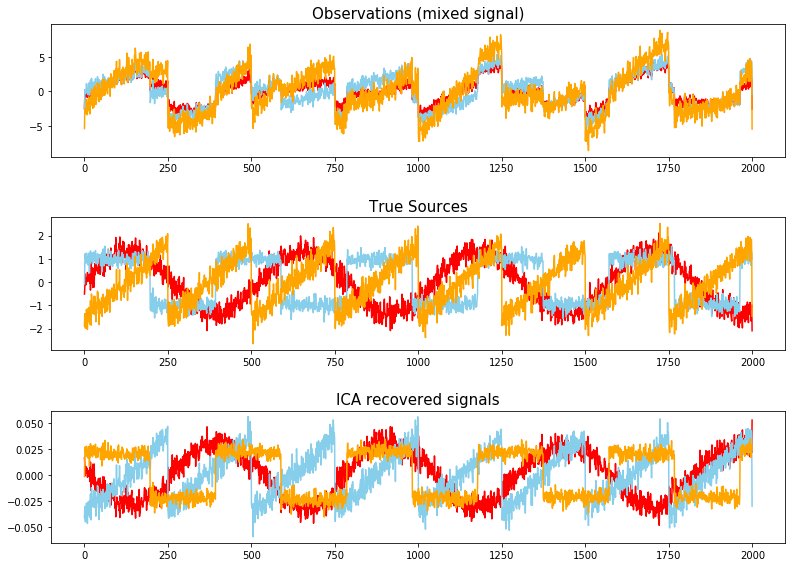

<Figure size 432x288 with 0 Axes>

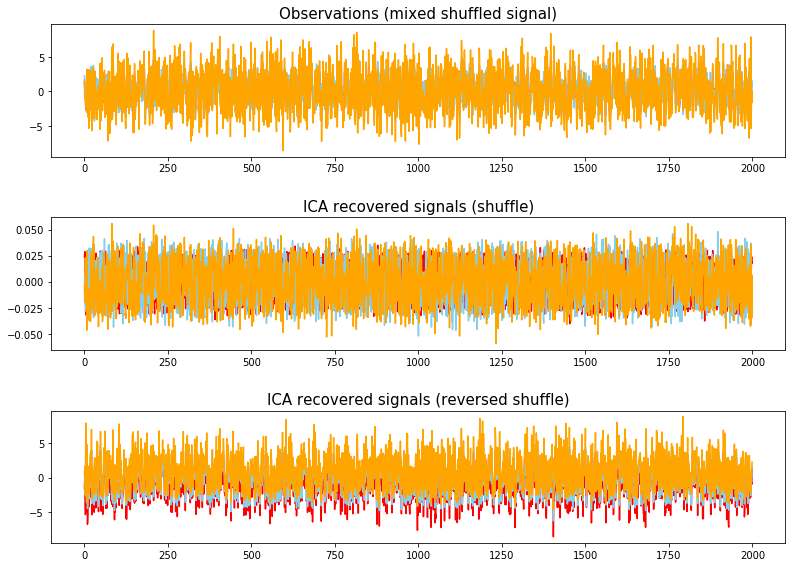

In [90]:
# Task (1): Randomly shuffle X


shuffle_X = np.random.permutation(X)
back_shuffle_S_ = np.take_along_axis(shuffle_X, np.argsort(shuffle_X), axis=-1)[::-1]

# Task (2): Re-Train ICA model on X_shuffled and un-shuffle the reconstructed sources 
ica2 = FastICA(n_components=3)  # this might be dumdum approach, but print(ica) shows other possible params
shuffle_S_ = ica2.fit_transform(shuffle_X)      # print(S_) gives us the signals
shuffle_A_ = ica2.mixing_    
# back_shuffle_S_ = shuffle_S_[idx]
sm = [shuffle_X, shuffle_S_, back_shuffle_S_]
sn = ['Observations (mixed shuffled signal)',
      'ICA recovered signals (shuffle)',
      'ICA recovered signals (reversed shuffle)']


# Task (3): Visualize the different signals
plt.figure(4)
visualize_data(m, n)
plt.figure(5)
visualize_data(sm,sn)

# f = plt.figure(figsize=(10,3))
# for _ in range(3):
# #     ax.flat[_].plot(sm[:,_])
#     plt.plot(sm[:,_], alpha=0.5)

#### Q4.3.3) Compare the reconstructed ICA-sources for the shuffled data and the non-shuffled data - can you give a reason for your observation?
- note: this applies to our discussion shuffled vs. original NOT shuffled vs. non-shuffled
- noise seems to have increased in the reconstruction (try signal-to-noise ration to maybe quantify that)
- we cannot even distinguish the original signals (based on shapes or other features like amplitude)
- the only thing we can tell is that the amplitude overall is about 100 times smaller in the recovered shuffled signal

## Remove ICA component from your observations

Now, we want to remove the contribution of two singers from the studio recordings $X$ such that only the contribution of singer 1 (sinusoidal waveform) remains. Therefore, you need to do the following steps:

__Tasks:__
1. Take the unmixing matrix $W=\hat A^{-1}$ of the component/s you want to keep and project the observation data $X$ to the  source space $S_{rec}$
2. Use the estimated mixing matrix $\hat A$ of the component/s you want to keep and project the reconstructed sources $S_{rec}$ back to the observation space $X_{clean}$. 
3. Visualize the cleaned observations $X_{clean}$, the original observations $X$ as well as the reconstructed sources $S_{rec}$.

__Hint:__ When selecting the components you want to remove from the observations, it might help to iteratively look at the cleaned observations $X_{clean}$ in order to see the effect.

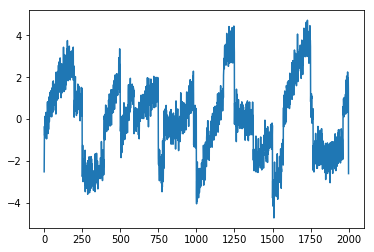

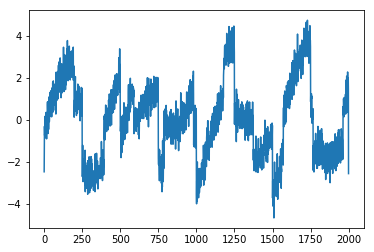

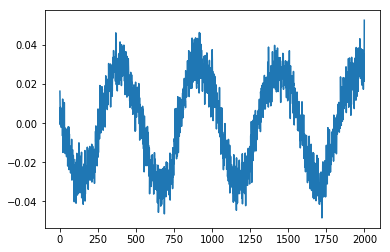

In [91]:
# Task (1): Project data of selected components to the source space, using the unmixing matrix
# from first exercise:
# A = np.array([[1, 1, 1], [0.3, 2, 1.2], [1.5, 1.2, 2.4]])  # Mixing matrix
W = np.linalg.inv(A_)
X_unmix = np.dot(X, W.T)

# Task (2): Project reconstructed ICA sources to the original space by mixing matrix 
plt.figure()
X_clean = np.dot(S_, A_.T)
plt.plot(X_clean[:,0])
plt.figure()
plt.plot(X[:,0])
plt.figure()
plt.plot(S_[:,0])

# Task (3): Visusalize the time series data


#### Q4.3.4) Revisit the 'ML design cycle' referred to in the lecture. To which block would you assign the removal of an ICA component? 

- pre-processing?
- feature extraction?

===Help===<br>
Dear Tutor(s),

we found the instruction for this last exercise to be a bit confusing. Even in the case where we wouldn't know the original signals, we could choose "the sinusoid" based on the reconstruction. That is, we "know" which channel to select. Maybe this can be discussed?

Thank you very much in advance!